In [1]:

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import zipfile
import os
from tqdm import tqdm

# Setting up

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# from google.colab import drive
# drive.mount('/content/drive')



: 

In [ ]:
# Unzipping uploaded file
"""
zip_path = "/content/drive/MyDrive/Colab Notebooks/train.zip"
extract_path = "/content/train" 

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
else:
    print("Data already extracted.")
"""

In [ ]:
"""
# Setting up transform: NO resize to ensure domain stays same
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Loading dataset
full_dataset = datasets.ImageFolder(root="train/train", transform=transform)

# Train-val splitting, 80/20
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# DataLoader
batch_size = 4

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Using pretrained ResNet18
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
for param in model.parameters():
    param.requires_grad = False  # Freeze freature extraction

# Setting correct output classes
num_classes = 5
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Loss function & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
"""


FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'train/train'

{'DR-0': 0, 'DR-1': 1, 'DR-2': 2, 'DR-3': 3, 'DR-4': 4}


Text(0.5, 1.0, 'Label: 0')

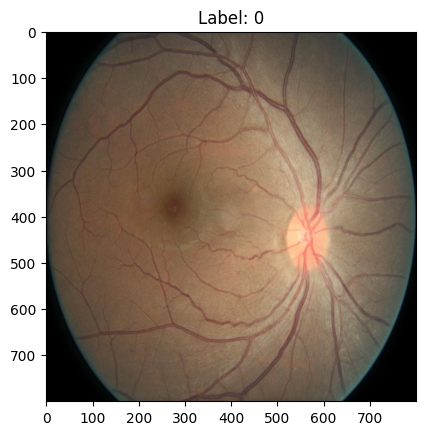

In [ ]:
"""
# Visualize dataset
print(full_dataset.class_to_idx)
import matplotlib.pyplot as plt
img, label = full_dataset[0]
plt.imshow(img.permute(1, 2, 0))
plt.title(f'Label: {label}')
"""

In [ ]:
"""
# Training loop
num_epochs = 10
best_val_acc = 0.0

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print("-"*30)

    # Training
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in tqdm(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / train_size
    epoch_acc = running_corrects.double() / train_size

    print(f"Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

    # Validation
    model.eval()
    val_running_corrects = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            val_running_corrects += torch.sum(preds == labels.data)

    val_acc = val_running_corrects.double() / val_size
    print(f"Val Acc: {val_acc:.4f}")

    # Storing, only stores best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "/content/drive/MyDrive/best_model_res18.pth")
        print("Best model saved to Google Drive!")

print("Training complete!")
print(f"Best val Acc: {best_val_acc:.4f}")
"""


Epoch 1/10
------------------------------


100%|██████████| 2509/2509 [03:13<00:00, 12.97it/s]

Train Loss: 0.8919 Acc: 0.7319


Val Acc: 0.7262
Best model saved to Google Drive!
Epoch 2/10
------------------------------


100%|██████████| 2509/2509 [03:14<00:00, 12.89it/s]

Train Loss: 0.8617 Acc: 0.7305


Val Acc: 0.7278
Best model saved to Google Drive!
Epoch 3/10
------------------------------


100%|██████████| 2509/2509 [03:14<00:00, 12.87it/s]

Train Loss: 0.8467 Acc: 0.7339


Val Acc: 0.7342
Best model saved to Google Drive!
Epoch 4/10
------------------------------


100%|██████████| 2509/2509 [03:15<00:00, 12.83it/s]

Train Loss: 0.8455 Acc: 0.7334


Val Acc: 0.7334
Epoch 5/10
------------------------------


100%|██████████| 2509/2509 [03:14<00:00, 12.93it/s]

Train Loss: 0.8275 Acc: 0.7360


Val Acc: 0.7318
Epoch 6/10
------------------------------


100%|██████████| 2509/2509 [03:13<00:00, 13.00it/s]

Train Loss: 0.8332 Acc: 0.7313


Val Acc: 0.7409
Best model saved to Google Drive!
Epoch 7/10
------------------------------


100%|██████████| 2509/2509 [03:12<00:00, 13.05it/s]

Train Loss: 0.8220 Acc: 0.7347


Val Acc: 0.7354
Epoch 8/10
------------------------------


100%|██████████| 2509/2509 [03:12<00:00, 13.02it/s]

Train Loss: 0.8265 Acc: 0.7340


Val Acc: 0.7322
Epoch 9/10
------------------------------


100%|██████████| 2509/2509 [03:11<00:00, 13.09it/s]


Train Loss: 0.8264 Acc: 0.7340
Val Acc: 0.7377
Epoch 10/10
------------------------------


100%|██████████| 2509/2509 [03:12<00:00, 13.07it/s]

Train Loss: 0.8188 Acc: 0.7382


Val Acc: 0.7393
Training complete!
Best val Acc: 0.7409


In [5]:
# Load model back for evaluation
modelRes = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
for param in modelRes.parameters():
    param.requires_grad = False

num_classes = 5
modelRes.fc = nn.Linear(modelRes.fc.in_features, num_classes)

modelRes.load_state_dict(torch.load('./best_model_res18.pth', map_location='cpu'))

modelRes.eval()
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [ ]:
# Loading evaluation datasets
test_dataset = datasets.ImageFolder(root='./test_labeled', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Evaluation inference
correct = 0
total = 0

all_preds = []
all_labels = []
all_image_paths = []

for inputs, labels in tqdm(test_loader):
    with torch.no_grad():
        outputs = modelRes(inputs)
        _, preds = torch.max(outputs, 1)

    correct += (preds == labels).sum().item()
    total += labels.size(0)

    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

print(f'Test Accuracy: {correct/total:.4f}')

report = classification_report(all_labels, all_preds, target_names=test_dataset.classes)
print(report)

In [ ]:
from sklearn.metrics import classification_report




              precision    recall  f1-score   support

        DR-0       0.69      1.00      0.82      2234
        DR-1       0.00      0.00      0.00       159
        DR-2       0.00      0.00      0.00       555
        DR-3       0.00      0.00      0.00        97
        DR-4       0.00      0.00      0.00       175

    accuracy                           0.69      3220
   macro avg       0.14      0.20      0.16      3220
weighted avg       0.48      0.69      0.57      3220



c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import os
from tqdm import tqdm

# Labeling the images based on label csv files
# Read and concat both csvs
train_df = pd.read_csv('Label_EyeQ_train.csv')
test_df = pd.read_csv('Label_EyeQ_test.csv')
all_labels = pd.concat([train_df, test_df], axis=0)

# Find folder to process
image_folder = './test/original/Reject'
image_files = os.listdir(image_folder)

# Processing
results = []

for img_file in tqdm(image_files):
    img_name, _ = os.path.splitext(img_file)
    prefix_parts = img_name.split('_')
    if len(prefix_parts) >= 2:
        prefix = prefix_parts[0] + '_' + prefix_parts[1]  # xxxxx_left or xxxxx_right
    else:
        continue 


    # Find correspondant row
    matched = all_labels[all_labels['image'].str.contains(prefix, regex=False)]

    if not matched.empty:
        label_info = matched.iloc[0]
        results.append({
            'real_image': img_file,
            'DR_grade': label_info['DR_grade']
        })
    else:
        print(f"Warning: No match for {img_file}")

# Save result
results_df = pd.DataFrame(results)
results_df.to_csv('final_dr_grade_labels_unenhanced.csv', index=False)
print('Done! Saved to final_dr_grade_labels_unenhanced.csv')


100%|██████████| 3220/3220 [00:54<00:00, 59.37it/s] 

Done! Saved to final_dr_grade_labels_unenhanced.csv


In [ ]:

import shutil


# According to previous label file, organize the folder into a labeled folder

labels_df = pd.read_csv('final_dr_grade_labels_unenhanced.csv') 

# Where to look
source_folder = './test/original/Reject' 

# Where to put
target_base = './test_labeled_unenhanced'

# Copy each found image to target folder in labeled sub folder
for idx, row in tqdm(labels_df.iterrows(), total=len(labels_df)):
    img_name = row['real_image']
    dr_grade = row['DR_grade']

    # Subfolder
    target_folder = os.path.join(target_base, f'DR-{dr_grade}')
    os.makedirs(target_folder, exist_ok=True) 

    # Copy images
    source_path = os.path.join(source_folder, img_name)
    target_path = os.path.join(target_folder, img_name)
    if os.path.exists(source_path):
        shutil.copy(source_path, target_path)
    else:
        print(f"Warning: {source_path} not found!")

print("✅ All images sorted successfully!")


100%|██████████| 3220/3220 [00:45<00:00, 71.40it/s] 

✅ All images sorted successfully!


In [ ]:
# Evaluation on unenhanced data
modelRes.eval()
transform = transforms.Compose([
    transforms.ToTensor(),
])

test_dataset = datasets.ImageFolder(root='./test_labeled_unenhanced', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


correct = 0
total = 0

all_preds = []
all_labels = []
all_image_paths = []

for inputs, labels in tqdm(test_loader):
    with torch.no_grad():
        outputs = modelRes(inputs)
        _, preds = torch.max(outputs, 1)

    correct += (preds == labels).sum().item()
    total += labels.size(0)

    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())


print(f'Test Accuracy: {correct/total:.4f}')

100%|██████████| 101/101 [51:23<00:00, 30.53s/it]

Test Accuracy: 0.6938


In [12]:
from sklearn.metrics import classification_report


report = classification_report(all_labels, all_preds, target_names=test_dataset.classes)
print(report)

              precision    recall  f1-score   support

        DR-0       0.69      1.00      0.82      2234
        DR-1       0.00      0.00      0.00       159
        DR-2       0.00      0.00      0.00       555
        DR-3       0.00      0.00      0.00        97
        DR-4       0.00      0.00      0.00       175

    accuracy                           0.69      3220
   macro avg       0.14      0.20      0.16      3220
weighted avg       0.48      0.69      0.57      3220



c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
